# DyNAS-T Plotting Tutorial

By default, DyNAS-T writes to a user-defined CSV file during the neural architecture search (NAS) process. This gives you the flexibility to decide what to do with the data, and also allows you look at the search results as they are in progress. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import seaborn as sns

## Single-Objective Swarmplot

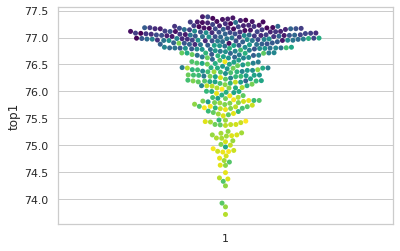

In [2]:
evals = 500
df_ga = pd.read_csv('data/mbnv3w10_evoga_acc.csv')[:evals]
df_ga.columns = ['config', 'date', 'params', 'latency', 'macs', 'accuracy_top1']


sns.set(style='whitegrid')
palette = sns.color_palette("viridis_r", n_colors=len(df_ga) )
sns.swarmplot(x=[1]*len(df_ga), y='accuracy_top1', hue=df_ga.index.tolist(), data=df_ga, palette=palette)
plt.legend([],[], frameon=False)
plt.show();

/venv/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


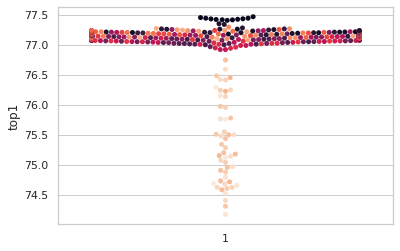

In [12]:
df_linas = pd.read_csv('data/mbnv3w10_linasga_acc.csv')[:evals]
df_linas.columns = ['config', 'date', 'params', 'latency', 'macs', 'accuracy_top1']
palette = sns.color_palette("rocket_r", n_colors=len(df_linas) )
sns.swarmplot(x=[1]*len(df_linas), y='accuracy_top1', hue=df_linas.index.tolist(), data=df_linas, palette=palette)
plt.legend([],[], frameon=False)

plt.show();

# Multi-Objective Scatterplot

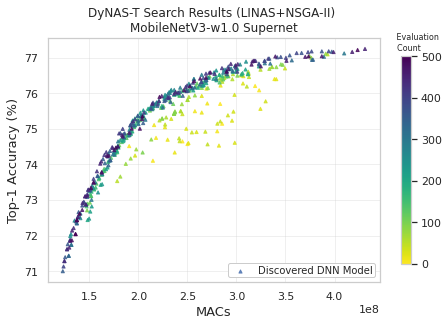

In [5]:
evals = 500
df_dynas = pd.read_csv('data/mbnv3w10_linasnsga2_acc_macs.csv')[:evals]
df_dynas.columns = ['config', 'date', 'params', 'latency', 'macs', 'accuracy_top1']

fig, ax = plt.subplots(figsize=(7,5))

cm = plt.cm.get_cmap('viridis_r')
count = [x for x in range(len(df_dynas))]

ax.scatter(df_dynas['macs'].values, df_dynas['accuracy_top1'].values, marker='^', alpha=0.8, c=count, 
           cmap=cm, label='Discovered DNN Model', s=10)
ax.set_title('DyNAS-T Search Results (LINAS+NSGA-II) \nMobileNetV3-w1.0 Supernet')
ax.set_xlabel('MACs', fontsize=13)
ax.set_ylabel('Top-1 Accuracy (%)', fontsize=13)
ax.legend(fancybox=True, fontsize=10, framealpha=1, borderpad=0.2, loc='lower right')
ax.grid(True, alpha=0.3)
#ax.set_ylim(72,77.5)

# Eval Count bar
norm = plt.Normalize(0, len(df_dynas))
sm = ScalarMappable(norm=norm, cmap=cm)
cbar = fig.colorbar(sm, ax=ax, shrink=0.85)
cbar.ax.set_title("         Evaluation\n  Count", fontsize=8)

fig.tight_layout(pad=2)
plt.show();

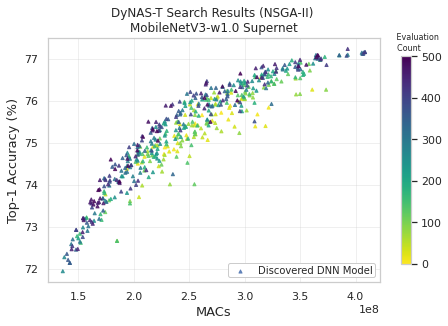

In [6]:
evals = 500
df_dynas = pd.read_csv('data/mbnv3w10_evonsga2_acc_macs.csv')[:evals]
df_dynas.columns = ['config', 'date', 'params', 'latency', 'macs', 'accuracy_top1']

fig, ax = plt.subplots(figsize=(7,5))

cm = plt.cm.get_cmap('viridis_r')
count = [x for x in range(len(df_dynas))]

ax.scatter(df_dynas['macs'].values, df_dynas['accuracy_top1'].values, marker='^', alpha=0.8, c=count, 
           cmap=cm, label='Discovered DNN Model', s=10)
ax.set_title('DyNAS-T Search Results (NSGA-II) \nMobileNetV3-w1.0 Supernet')
ax.set_xlabel('MACs', fontsize=13)
ax.set_ylabel('Top-1 Accuracy (%)', fontsize=13)
ax.legend(fancybox=True, fontsize=10, framealpha=1, borderpad=0.2, loc='lower right')
ax.grid(True, alpha=0.3)
#ax.set_ylim(72,77.5)

# Eval Count bar
norm = plt.Normalize(0, len(df_dynas))
sm = ScalarMappable(norm=norm, cmap=cm)
cbar = fig.colorbar(sm, ax=ax, shrink=0.85)
cbar.ax.set_title("         Evaluation\n  Count", fontsize=8)

fig.tight_layout(pad=2)
plt.show();

## Many-Objective

<IPython.core.display.Javascript object>


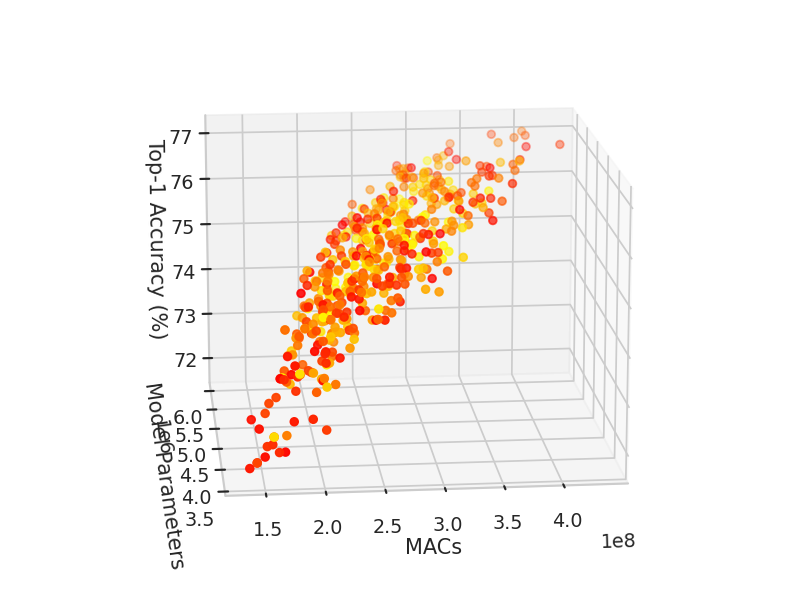

In [3]:
# creating 3d plot using matplotlib 
# in python

%matplotlib nbagg

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D

evals=500
df_unsga3 = pd.read_csv('data/mbnv3w10_evounsga3_acc_macs_params.csv')[:evals]
df_unsga3.columns = ['config', 'date', 'params', 'latency', 'macs', 'accuracy_top1']

# dataset
xs = df_unsga3['macs'].values.tolist()
ys = df_unsga3['params'].values.tolist()
zs = df_unsga3['accuracy_top1'].values.tolist()
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
cm = plt.cm.get_cmap('autumn_r') 
count = [x for x in range(len(df_unsga3))]

# creating the plot
ax.scatter(xs, ys, zs, c=count, cmap=cm, label='U-NSGA-III')
    
# setting title and labels
ax.set_title("Many Objective Search")
ax.set_xlabel('MACs')
ax.set_ylabel('Model Parameters')
ax.set_zlabel('Top-1 Accuracy (%)')
  
# displaying the plot
plt.show();